<a href="https://colab.research.google.com/github/susan291-gifs/SussieAssignment/blob/main/HousePrice_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Problem 1

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/train.csv')
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Problem 2

### Description
Start here if...
You have some experience with R or Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition.

💡Getting Started Notebook
To get started quickly, feel free to take advantage of this starter notebook.

### Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Practice Skills
Creative feature engineering
Advanced regression techniques like random forest and gradient boosting
Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

Photo by Tom Thain on Unsplash.

### Evaluation
Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### Problem 3

In [ ]:
print("1. 4th Sample:")
print(df.iloc[3])

print("\n2. Total Number of Samples for Each Lable:")
print(df["SalePrice"].value_counts())

print("\n3. Missing value check:")
print(df.isnull().sum())

print("\n4. Descriptive Statistics:")
print(df.describe())

1. 4th Sample:
Id                     4
MSSubClass            70
MSZoning              RL
LotFrontage         60.0
LotArea             9550
                  ...   
MoSold                 2
YrSold              2006
SaleType              WD
SaleCondition    Abnorml
SalePrice         140000
Name: 3, Length: 81, dtype: object

2. Total Number of Samples for Each Lable:
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

3. Missing value check:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

4. Descriptive Statistics:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000 

### Problem 4

In [ ]:
missing_values = df.isnull().sum()

missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Total' : missing_values,
    'Missing Ratio': missing_percentage
})

print("\nPercentage of Missing Values for Each Feature:")
print(missing_info)

threshold = 5

features_to_drop = missing_values[missing_values >= threshold].index

df_cleaned_features = df.drop(columns=features_to_drop)

print("\nDataFrame after Dropping Features:")
print(df_cleaned_features)

df_cleaned_samples = df_cleaned_features.dropna()
print("\nDataFrame after Dropping Samples:")
print(df_cleaned_samples)


Percentage of Missing Values for Each Feature:
               Total  Missing Ratio
Id                 0       0.000000
MSSubClass         0       0.000000
MSZoning           0       0.000000
LotFrontage      259      17.739726
LotArea            0       0.000000
...              ...            ...
MoSold             0       0.000000
YrSold             0       0.000000
SaleType           0       0.000000
SaleCondition      0       0.000000
SalePrice          0       0.000000

[81 rows x 2 columns]

DataFrame after Dropping Features:
        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      .

### Problem 5

### Kurtosis:
Kurtosis is a statistical measure that describes the distribution of data in a dataset. It quantifies the "tailedness" or the degree of outliers in the data. There are three main types of kurtosis:

Mesokurtic (Normal): A normal distribution with kurtosis equal to zero. The tails are neither too heavy nor too light.

Leptokurtic (Positive Kurtosis): The distribution has heavier tails and a sharper peak than the normal distribution. It indicates more outliers.

Platykurtic (Negative Kurtosis): The distribution has lighter tails and a flatter peak than the normal distribution. It indicates fewer outliers.

Kurtosis is often used in finance, economics, and risk management to understand the shape and behavior of data distributions.

### Skewness:
Skewness is another statistical measure that describes the asymmetry or skewness of a probability distribution. It indicates the degree and direction of skew (departure from horizontal symmetry) in the data. Skewness can be positive, negative, or zero:

Positive Skewness: The distribution is skewed to the right, indicating a longer right tail. The mean is typically greater than the median.

Negative Skewness: The distribution is skewed to the left, indicating a longer left tail. The mean is typically less than the median.

Zero Skewness: The distribution is perfectly symmetrical.

Skewness is useful in understanding the shape of a distribution and can be crucial in finance, economics, and other fields where understanding the nature of data is important.

### Problem 6

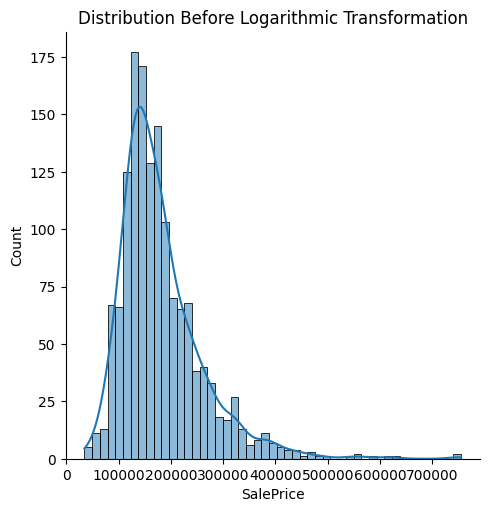

Kurtosis before logarithmic transformation: 6.536281860064529
Skewness before logarithmic transformation: 1.8828757597682129


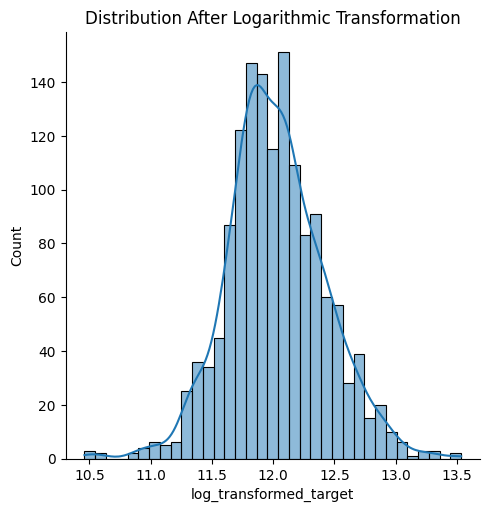

Kurtosis after logarithmic transformation: 0.809519155707878
Skewness after logarithmic transformation: 0.12134661989685333


In [ ]:
sns.displot(df['SalePrice'], kde=True)
plt.title('Distribution Before Logarithmic Transformation')
plt.show()

kurt_before = df['SalePrice'].kurtosis()
skew_before = df['SalePrice'].skew()

print(f'Kurtosis before logarithmic transformation: {kurt_before}')
print(f'Skewness before logarithmic transformation: {skew_before}')

df['log_transformed_target'] = np.log1p(df['SalePrice'])

sns.displot(df['log_transformed_target'], kde=True)
plt.title('Distribution After Logarithmic Transformation')
plt.show()

kurt_after = df['log_transformed_target'].kurtosis()
skew_after = df['log_transformed_target'].skew()

print(f'Kurtosis after logarithmic transformation: {kurt_after}')
print(f'Skewness after logarithmic transformation: {skew_after}')

### Problem 7

<ipython-input-8-5fb939fb3c0d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


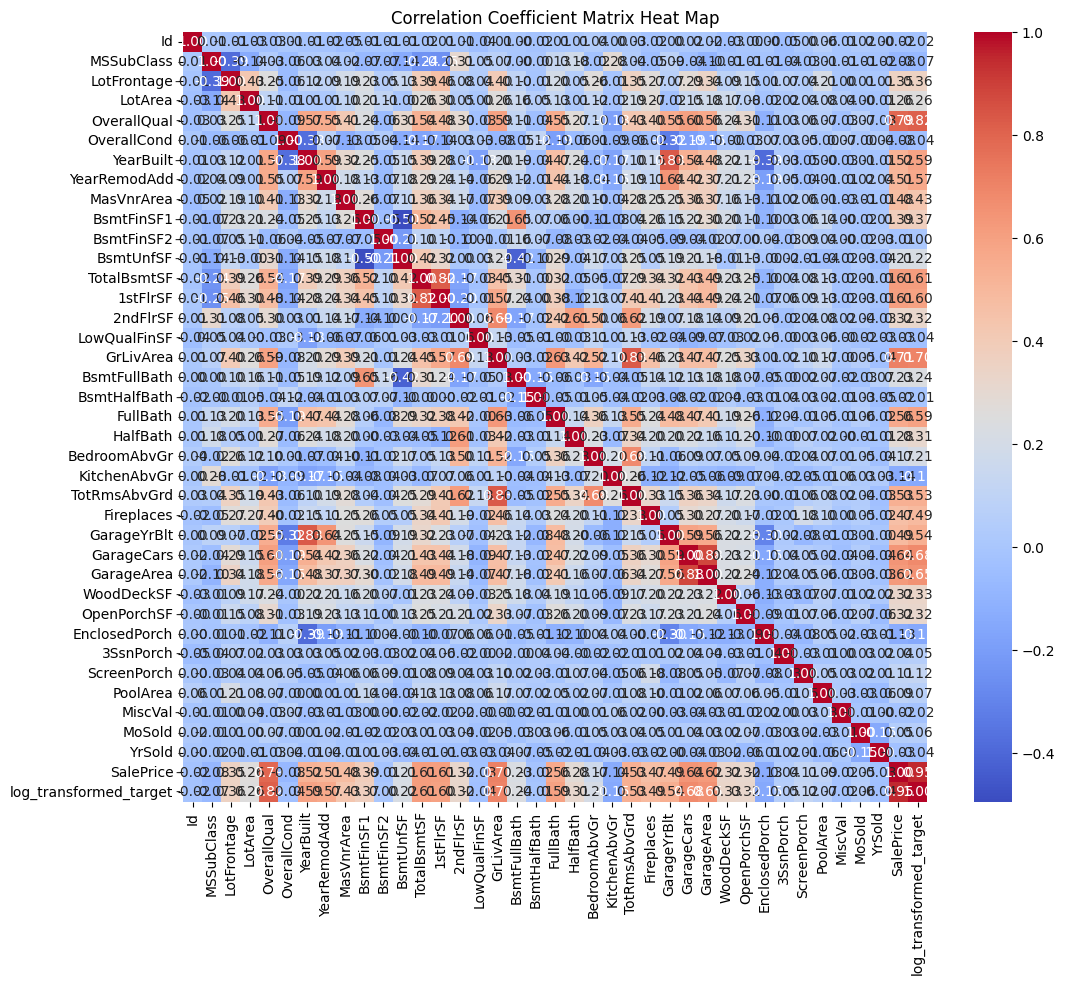

In [ ]:
correlation_matrix = df.corr()

# Create a heat map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Coefficient Matrix Heat Map')
plt.show()

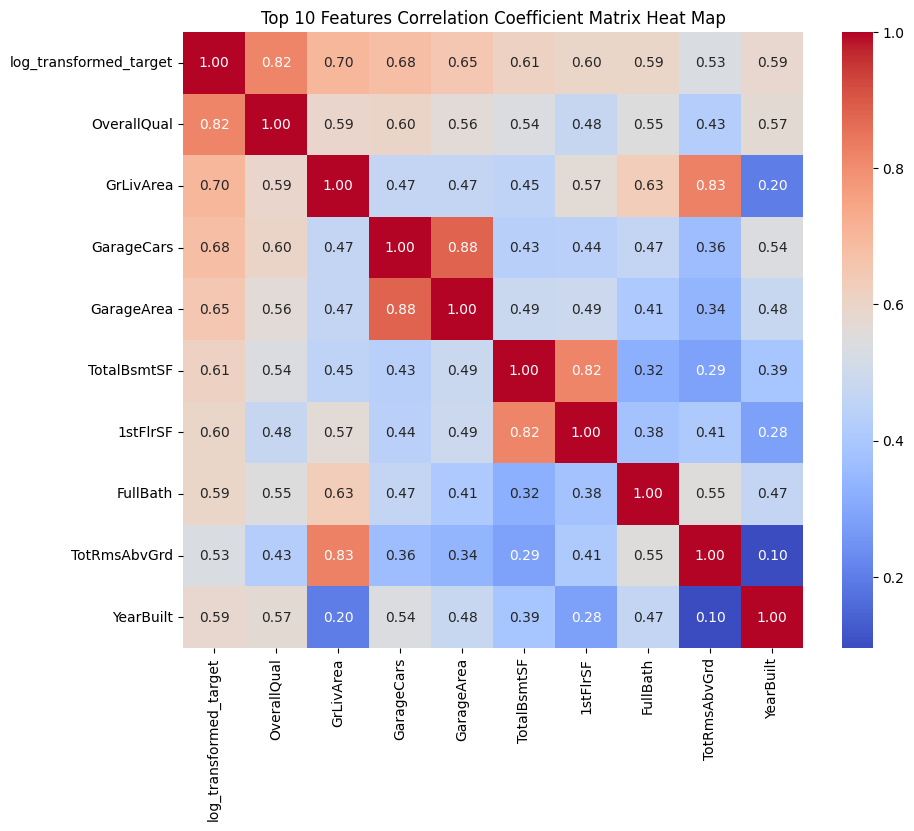

In [ ]:
target_correlation = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
top_10_features = target_correlation[1:11].index

# Create a correlation matrix for the top 10 features
top_10_matrix = df[top_10_features].corr()

# Create a heat map for the top 10 features
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Top 10 Features Correlation Coefficient Matrix Heat Map')
plt.show()

In [ ]:
combinations = []
threshold = 0.7  # Adjust the threshold based on your criteria

for i in range(len(top_10_features)):
    for j in range(i+1, len(top_10_features)):
        correlation = df[[top_10_features[i], top_10_features[j]]].corr().iloc[0, 1]
        if abs(correlation) > threshold:
            combinations.append((top_10_features[i], top_10_features[j], correlation))

# Display the found combinations
print("Highly Correlated Feature Combinations:")
for combo in combinations:
    print(f"{combo[0]} and {combo[1]} with correlation: {combo[2]}")

Highly Correlated Feature Combinations:
log_transformed_target and OverallQual with correlation: 0.817184614486768
log_transformed_target and GrLivArea with correlation: 0.7009269871427141
GrLivArea and TotRmsAbvGrd with correlation: 0.8254893743088425
GarageCars and GarageArea with correlation: 0.882475414281462
TotalBsmtSF and 1stFlrSF with correlation: 0.8195299750050339
